<a href="https://colab.research.google.com/github/Tanvi120904/Tree_Species_Identification/blob/main/Tree_Species_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import os

repo_path = "/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset" # Adjust if cloned to a different name
print("Contents:", os.listdir(repo_path))

Contents: ['simlo', 'sitafal', 'vad', 'sugarcane', 'saptaparni', 'shirish', 'pilikaren', 'pipal', 'sonmahor', 'other', 'nilgiri', 'motichanoti', 'neem', 'khajur', 'mango', 'kesudo', 'kanchan', 'jamun', 'gunda', 'gulmohor', 'garmalo', 'coconut', 'champa', 'cactus', 'bili', 'banyan', 'babul', 'bamboo', 'asopalav', 'amla', '.git']


In [14]:
class_dirs = os.listdir(repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 31


In [15]:
import glob

image_paths = []
labels = []

for class_name in os.listdir(repo_path):
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1459


In [16]:
import os
import pandas as pd

# 3. Set the dataset path
repo_path = '/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset'

# 4. Get list of class directories (tree species)
class_dirs = os.listdir(repo_path)

# 5. Count number of images in each class
class_counts = {
    cls: len(os.listdir(os.path.join(repo_path, cls)))
    for cls in class_dirs
}

# 6. Create a DataFrame for visualization
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])

# 7. Print top classes by image count
print(class_counts_df.sort_values('Image Count', ascending=False).head())

# 8. Print shape of the DataFrame
print("shape: ", class_counts_df.shape)

           Image Count
other              125
neem                50
sugarcane           50
bamboo              50
shirish             49
shape:  (31, 1)


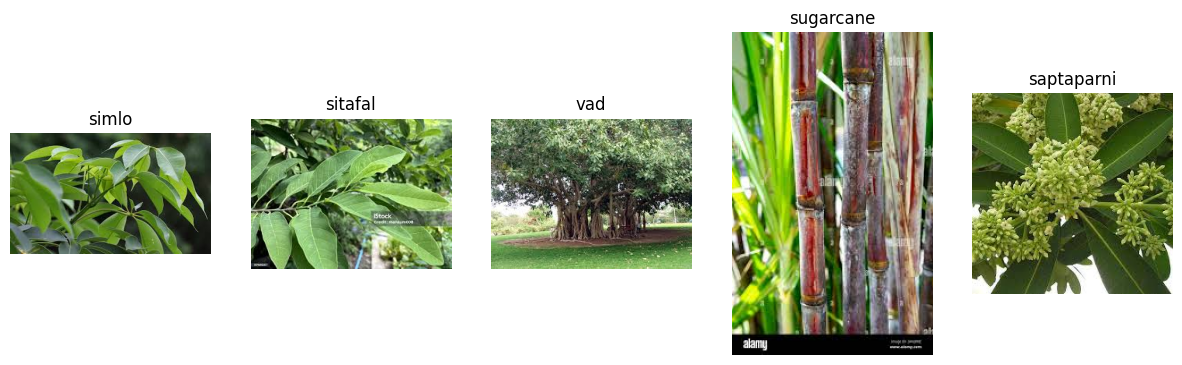

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to show sample images from the dataset
def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif') # Add or remove extensions as needed
    displayed_count = 0  # Counter for images displayed

    for i, class_dir in enumerate(class_dirs):
        if displayed_count >= n:
            break # Stop if we have displayed n images

        # Full path to the class directory
        class_path = os.path.join(repo_path, class_dir)

        # Skip if it's not a directory or if it's a hidden directory like .git
        if not os.path.isdir(class_path) or class_dir.startswith('.'):
            continue

        # Get list of image files in the class directory
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(image_extensions)]

        if len(image_files) == 0:
            continue  # Skip if no images

        # Full path to first image in the class
        img_path = os.path.join(class_path, image_files[0])

        try:
            # Open and show image
            img = Image.open(img_path)
            plt.subplot(1, n, displayed_count + 1)
            plt.imshow(img)
            plt.title(class_dir)
            plt.axis('off')
            displayed_count += 1
        except Exception as e:
            print(f"Could not open image {img_path}: {e}")
            continue

    plt.show()

# Set repo_path (if not done already)
repo_path = '/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset'
class_dirs = os.listdir(repo_path)

# Show images
show_sample_images(repo_path, class_dirs)

In [18]:
from PIL import Image
import os
import pandas as pd

# Define dataset path
repo_path = '/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset'

# Initialize list for image dimensions
image_shapes = []
image_names = []
class_labels = []

# Traverse each class directory
for class_dir in os.listdir(repo_path):
    class_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    image_shapes.append((width, height))
                    image_names.append(img_file)
                    class_labels.append(class_dir)
            except Exception as e:
                print(f"Skipped {img_path} due to error: {e}")

# Create DataFrame
shapes_df = pd.DataFrame(image_shapes, columns=['Width', 'Height'])
shapes_df['Filename'] = image_names
shapes_df['Class'] = class_labels

# Preview first 5 entries
shapes_df.head()


Skipped /content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/config due to error: cannot identify image file '/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/config'
Skipped /content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/description due to error: cannot identify image file '/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/description'
Skipped /content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/HEAD due to error: cannot identify image file '/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/HEAD'
Skipped /content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/info due to error: [Errno 21] Is a directory: '/content/drive/MyDrive/Tree-Species_Identification/archive/Tree_Species_Dataset/.git/info'
Skipped /content/drive/MyDrive/Tree-Species_Identification

,Width,Height,Filename,Class
0,289,175,download (4).jpeg,simlo
1,260,194,images (10).jpeg,simlo
2,194,259,download (3).jpeg,simlo
3,275,183,images (13).jpeg,simlo
4,259,194,images (12).jpeg,simlo


In [19]:
# Display descriptive statistics of the shapes_df
display(shapes_df.describe())

# Display the value counts for unique image shapes
display(shapes_df.value_counts())

,Width,Height
count,1454.000000,1454.000000
mean,275.872765,239.044704
std,117.507849,117.197342
min,150.000000,150.000000
25%,225.000000,183.000000
50%,259.000000,198.000000
75%,275.000000,256.000000
max,1000.000000,1247.000000


Width  Height  Filename          Class    
1000   1000    image47.jpg       mango        1
150    150     images (2).jpeg   bili         1
       335     images (10).jpeg  amla         1
151    334     images (4).jpeg   shirish      1
154    326     images (33).jpeg  amla         1
                                             ..
174    289     images (34).jpeg  cactus       1
173    291     download.jpeg     sitafal      1
170    297     images (1).jpeg   other        1
169    299     images (25).jpg   pilikaren    1
               images (12).jpeg  khajur       1
Name: count, Length: 1454, dtype: int64

In [20]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
  class_path = os.path.join(repo_path, class_dir)
  if not os.path.isdir(class_path) or class_dir.startswith('.'):
      continue  # Skip if not a directory or a hidden directory

  for img_file in os.listdir(class_path):
    img_path = os.path.join(class_path, img_file)
    if os.path.isfile(img_path): # Check if it's a file
      try:
        with open(img_path, 'rb') as f:
          file_hash = hashlib.sha1(f.read()).hexdigest()
        hashes[file_hash].append(img_path)
      except Exception as e:
        print(f"Could not process file {img_path}: {e}")


#filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate images sets found:", len(duplicates))
#display duplicates

Duplicate images sets found: 0


In [21]:
corrupt_images = []

for class_dir in class_dirs:
  for img_file in os.listdir(os.path.join(repo_path, class_dir)):
    img_path = os.path.join(repo_path, class_dir, img_file)
    try:
      with Image.open(img_path) as img:
        img.verify()
    except Exception as e:
      corrupt_images.append(img_path)

print("Corrupt images found:", len(corrupt_images))

Corrupt images found: 5


In [22]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    if not os.path.isdir(class_path) or class_dir.startswith('.'):
        continue  # Skip if not a directory or a hidden directory

    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        if os.path.isfile(img_path): # Check if it's a file
            try:
                with open(img_path, 'rb') as f:
                    file_hash = hashlib.md5(f.read()).hexdigest()
                    hashes[file_hash].append(img_path)
            except Exception as e:
                print(f"Could not process file {img_path}: {e}")

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 0


In [ ]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 5


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [ ]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 0 duplicate images.


In [ ]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir) # Added class_path variable
    if not os.path.isdir(class_path) or class_dir.startswith('.'): # Added directory and hidden file check
        continue

    for img_file in os.listdir(class_path): # Changed to use class_path
        img_path = os.path.join(class_path, img_file) # Changed to use class_path
        if os.path.isfile(img_path): # Check if it's a file
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [23]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 0
🔺 Very large images: 0


In [24]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.0516 - loss: 4.1271 - val_accuracy: 0.0975 - val_loss: 3.2799
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.0958 - loss: 3.2721 - val_accuracy: 0.1372 - val_loss: 3.0393
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.1152 - loss: 3.1507 - val_accuracy: 0.1625 - val_loss: 2.9459
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.1616 - loss: 2.9808 - val_accuracy: 0.1697 - val_loss: 2.8030
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.1518 - loss: 2.9018 - val_accuracy: 0.2274 - val_loss: 2.7560
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.1925 - loss: 2.8378 - val_accuracy: 0.2383 - val_loss: 2.6937
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.2080 - loss: 2.7744 - val_accuracy: 0.2599 - val_loss: 2.5960
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - accuracy: 0.2404 - loss: 2.6803 - val_accuracy: 0.2383 - v

In [ ]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [ ]:
from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

# Define image dimensions and batch size
IMG_HEIGHT = 224  # Example value
IMG_WIDTH = 224   # Example value
BATCH_SIZE = 32   # Example value

# Create an ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 # Set validation split
)


train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000
Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)



NameError: name 'repo_path' is not defined

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [10]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

NameError: name 'model' is not defined

In [7]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

NameError: name 'history' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 0.0564 - loss: 3.9973 - val_accuracy: 0.0903 - val_loss: 3.2370
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.1195 - loss: 3.2267 - val_accuracy: 0.1661 - val_loss: 3.0298
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 199s 5s/step - accuracy: 0.1329 - loss: 3.0854 - val_accuracy: 0.1588 - val_loss: 3.0327
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.1470 - loss: 3.0226 - val_accuracy: 0.2022 - val_loss: 2.8014
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 188s 5s/step - accuracy: 0.1853 - loss: 2.8988 - val_accuracy: 0.2274 - val_loss: 2.7824
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 190s 5s/step - accuracy: 0.2009 - loss: 2.8186 - val_accuracy: 0.2527 - val_loss: 2.7066
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 204s 6s/step - accuracy: 0.2081 - loss: 2.7487 - val_accuracy: 0.2744 - val_loss: 2.6298
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 204s 6s/step - accuracy: 0.2362 - loss: 2.6965 - val_accuracy: 0.2744 - v

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


In [9]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'history_cnn' is not defined

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes for the correct number of classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'num_classes' is not defined